# DSA5102 Project: House Prices Advance Regression Techniques

Given 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. <br>
That can be found in: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

**Goal:** Predict the sales price for each house. <br>
**Metric:** Evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. <br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv('./train.csv')

In [3]:
## If I want to look at everything to check some stuff
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [4]:
display_all(df_raw)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [5]:
df_raw.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Looking into the data

Since we want to predict `SalePrice`, we will look at it in more details.

In [6]:
df_raw['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Min price is larger than 0.
Next we look at the histogram of `SalePrice`.

C:\Users\Ivan\anaconda3\envs\tensorflow2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


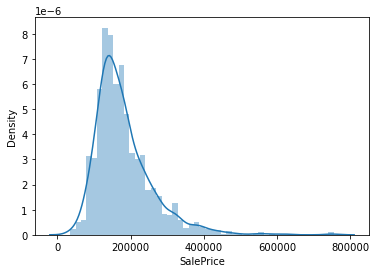

In [7]:
#histogram
sns.distplot(df_raw['SalePrice']);

We see 3 observation from this histogram. 
- Deviate from the normal distribution 
- Positively skewed
- Peak at approximately 150000.

**Skewness** is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

**Kurtosis** is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.

In [8]:
#skewness and kurtosis
print("Skewness: %f" % df_raw['SalePrice'].skew())
print("Kurtosis: %f" % df_raw['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero. Negative values for the skewness indicate data that are skewed left and positive values for the skewness indicate data that are skewed right. By skewed left, we mean that the left tail is long relative to the right tail. Similarly, skewed right means that the right tail is long relative to the left tail. 

Positive kurtosis indicates a "heavy-tailed" distribution and negative kurtosis indicates a "light tailed" distribution.
https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm#:~:text=Kurtosis%20is%20a%20measure%20of,would%20be%20the%20extreme%20case.


C:\Users\Ivan\anaconda3\envs\tensorflow2\lib\site-packages\ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator


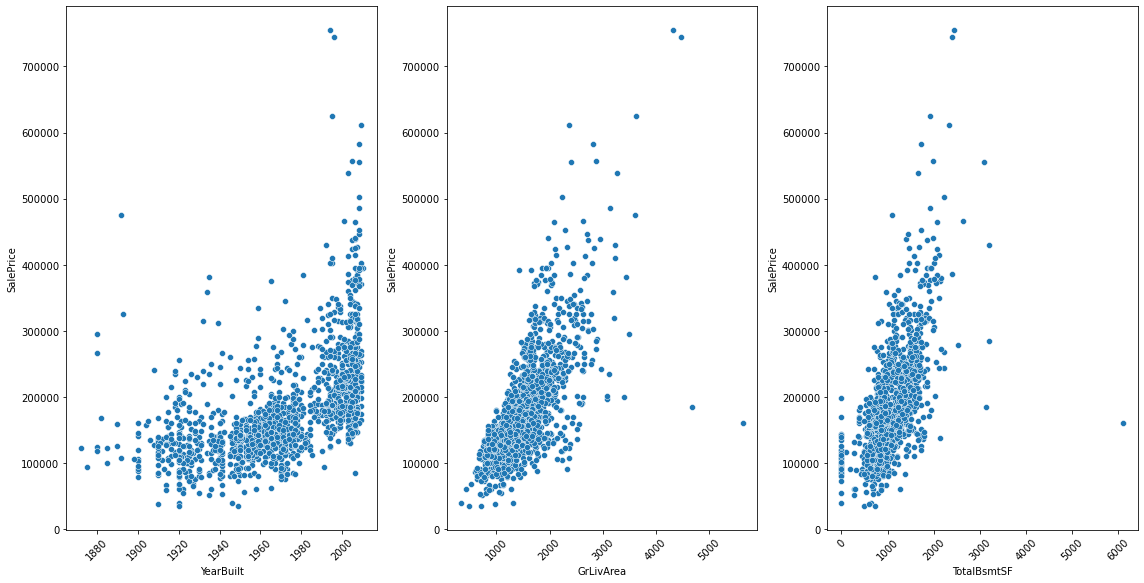

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))

sns.scatterplot(
    x='YearBuilt',
    y='SalePrice',
    data=df_raw,
    ax=ax[0]
)

sns.scatterplot(
    x='GrLivArea',
    y='SalePrice',
    data=df_raw,
    ax=ax[1]
)

sns.scatterplot(
    x='TotalBsmtSF',
    y='SalePrice',
    data=df_raw,
    ax=ax[2]
)


fig.tight_layout()

for a in ax:
    a.set_xticklabels(a.get_xticklabels(), rotation=45)

We observed here that there are some relationship between some of the numerical variables and the `SalePrice`. <br>
We see that indeed that the `SalePrice` and the `YearBuilt` seem to have a quadratic relationship or at least some show to proportion relationship. <br>
Next, the `SalePrice` grow almost linear relationship with `GrLivArea`. <br>
Lastly, we also see that `SalePrice` grow really fast with `TotalBsmtSF`. It could be that it is exponential in nature. 

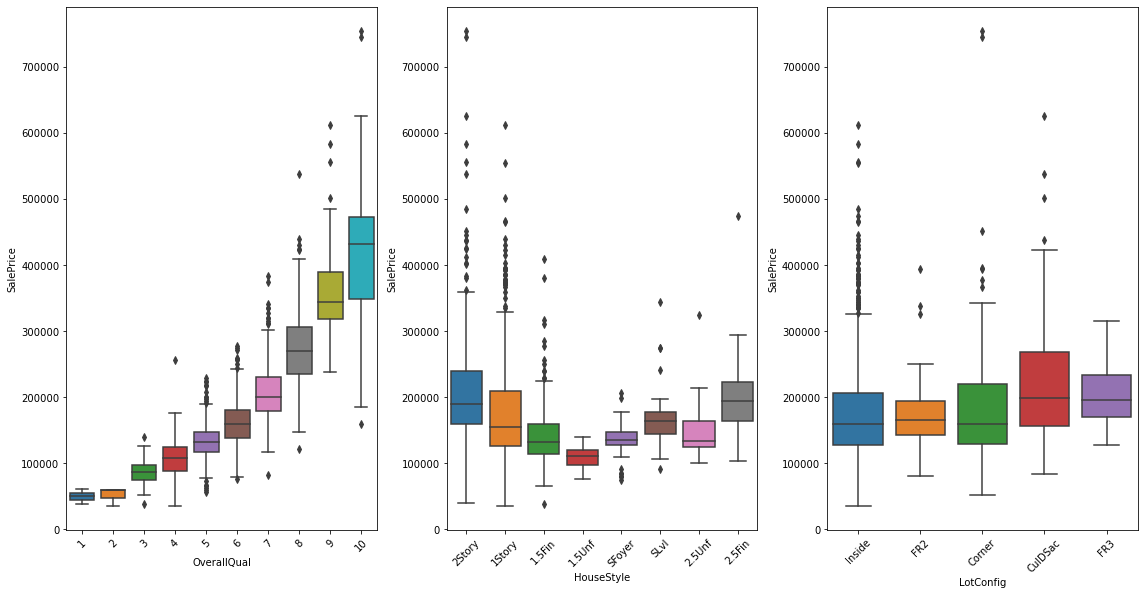

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))

sns.boxplot(
    x='OverallQual',
    y='SalePrice',
    data=df_raw,
    ax=ax[0]
)
    
sns.boxplot(
    x= 'HouseStyle',
    y='SalePrice',
    data=df_raw,
    ax=ax[1]
)

sns.boxplot(
    x='LotConfig',
    y='SalePrice',
    data=df_raw,
    ax=ax[2]
)


fig.tight_layout()

for a in ax:
    a.set_xticklabels(a.get_xticklabels(), rotation=45)

From the boxplot, we observed that `SalePrice` is indeed higher as the `OverallQual` increases. However, the range also varies wider. <br>
Next, we seethat indeed `HouseStyle` has some relationship with the `SalePrice`, as 2Story are relatively higher thatn 1Story and the Fin are higher than Unf in general.<br>
However, not much can be observed from `Lotconfig`.

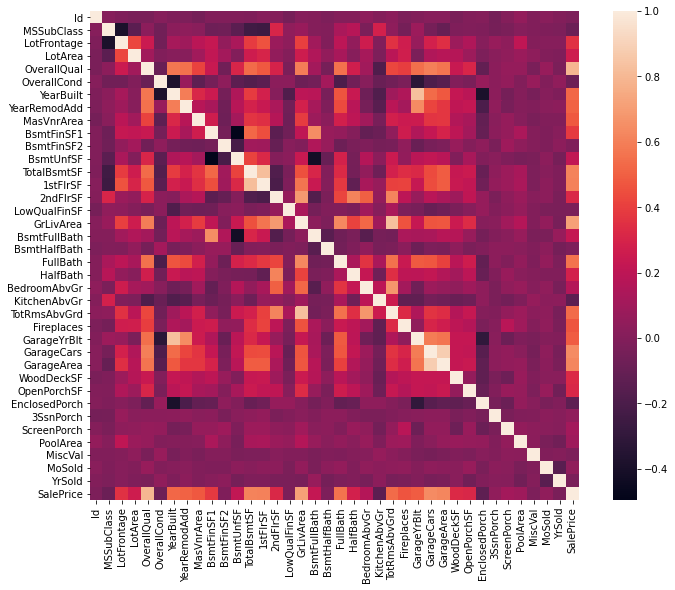

In [11]:
#correlation matrix
corrmat = df_raw.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

From here we see as a whole, which variables are correlated to one another and also to `SalePrice`.<br>
As observed from before, `OverallQual` and `GrLivArea` are very much correlated to `SalePrice`. 
We shall also plot a 

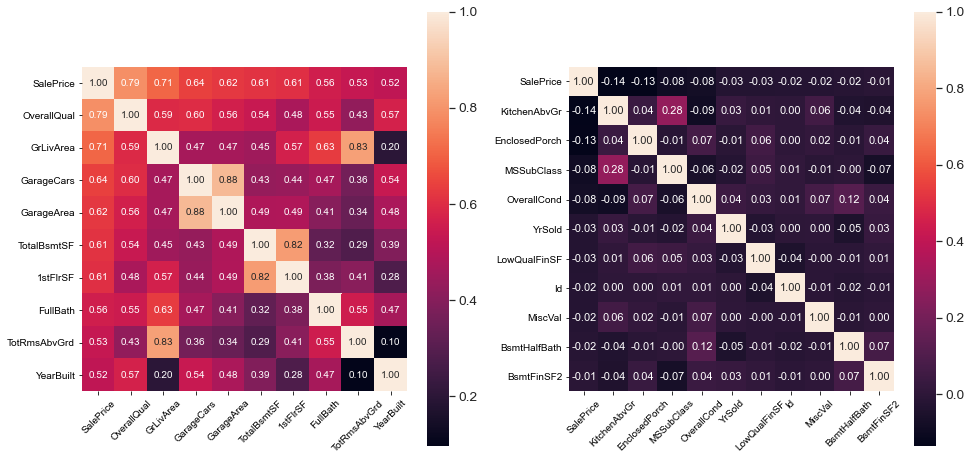

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols_largest = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cols_smallest = corrmat.nsmallest(k, 'SalePrice')['SalePrice'].index
cols_smallest = cols_smallest.insert(0, 'SalePrice')
cm_largest = np.corrcoef(df_raw[cols_largest].values.T)
cm_smallest = np.corrcoef(df_raw[cols_smallest].values.T)
sns.set(font_scale=1.25)
hm_largest = sns.heatmap(
    cm_largest, 
    cbar=True, 
    annot=True, 
    square=True, 
    fmt='.2f', 
    annot_kws={'size': 10},
    yticklabels=cols_largest.values, 
    xticklabels=cols_largest.values,
    ax = ax[0]
)

hm_smallest = sns.heatmap(
    cm_smallest, 
    cbar=True, 
    annot=True, 
    square=True, 
    fmt='.2f', 
    annot_kws={'size': 11},
    yticklabels=cols_smallest.values, 
    xticklabels=cols_smallest.values,
    ax = ax[1]
)

for a in ax:
    a.set_xticklabels(a.get_xticklabels(), rotation=45)

From here we see that we dont have any very inversely correlated variables with `SalePrice`. However we observed the top few correlated variables show above

## Initial Processing

In [13]:
## Since we want the LRSME so we will take log on the Sales prices.
df_raw.SalePrice= np.log(df_raw.SalePrice)

### Dealing with missing values

In [14]:
#missing data
total = df_raw.isnull().sum().sort_values(ascending=False)
percent = (df_raw.isnull().sum()/df_raw.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
display_all(missing_data)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


From here, we observed some significant missing data. And since such things are mostly not what we will think of when buying a house and removing them will not have much harm. Furthermore, we observed that most of the missing values are the same datas, and since `GarageCars` are mostly related we can remove anything to do with Garage. This is the same for Bsmt. Regarding `MasVnrArea` and `MasVnrType`, we can consider that these variables are not essential. Since `Electricity` only have one missing we will remove that particular datapoint instead of the whole column.

In [15]:
#dealing with missing data
df_raw = df_raw.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_raw = df_raw.drop(df_raw.loc[df_raw['Electrical'].isnull()].index)
#col_encoded = [] ##Looking into the types to and we observed that all the categories are in object types. We want to get a list of those categories and the numerical
#col_scale = []
#for n,c in df_raw.items():
#    if(df_raw[n].dtypes == object): ##means need to encode
 #       col_encoded.append(n)
  #  else: 
   #     col_scale.append(n)

### One hot encoding

In [16]:
df_raw = pd.get_dummies(df_raw)

In [17]:
df_raw.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


### Train,Test split 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_train, df_test = train_test_split(df_raw, test_size=0.1)

In [20]:
len(df_train)

1313

In [21]:
len(df_test)

146

### Spliting into x_train, x_test, y_train and y_test

In [22]:
x_train = df_train.loc[:, df_train.columns != 'SalePrice']
y_train = df_train['SalePrice']
x_test = df_test.loc[:, df_train.columns != 'SalePrice']
y_test = df_test['SalePrice']

In [23]:
display_all(x_train)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
147,148,60,9505,7,5,2001,2001,0,0,884,884,884,1151,0,2035,0,0,2,1,3,1,8,1,2,434,144,48,0,0,0,0,0,5,2010,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
968,969,50,5925,3,6

In [24]:
display_all(y_train)

147     12.312682
968     10.542706
678     12.827992
898     13.323927
1437    12.885671
          ...    
73      11.883799
192     12.165251
1396    11.982929
1423    12.524417
539     12.513557
Name: SalePrice, Length: 1313, dtype: float64

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [26]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

Mean accuracy: 0.14626302579012485
Std accuracy: 0.024043614977071557


<AxesSubplot:ylabel='Count'>

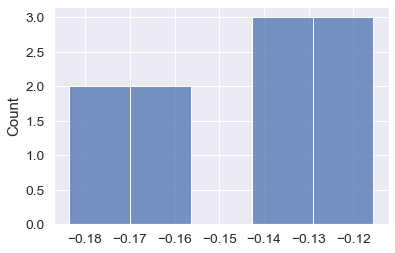

In [27]:
RandomForestReg =  RandomForestRegressor(n_estimators = 10)
scores_rand = cross_val_score(RandomForestReg, x_train, y_train, cv=10, scoring = 'neg_root_mean_squared_error')
print(f'Mean accuracy: {-np.mean(scores_rand)}')
print(f'Std accuracy: {np.std(scores_rand)}')
sns.histplot(scores_rand)

In [28]:
RandomForestReg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10)

In [29]:
y_hat_train = RandomForestReg.predict(x_train)
y_hat_test = RandomForestReg.predict(x_test)

In [30]:
print(f'Train error:{rmse(y_hat_train,y_train)}')
print(f'Test error:{rmse(y_hat_test,y_test)}')
print(f'Mean CV accuracy: {-np.mean(scores_rand)}')

Train error:0.06691058187861958
Test error:0.16110441335688042
Mean CV accuracy: 0.14626302579012485


### Random Forest with AdaBoostRegressor

Mean accuracy: 0.13960430187181547
Std accuracy: 0.02670578796336957


C:\Users\Ivan\anaconda3\envs\tensorflow2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

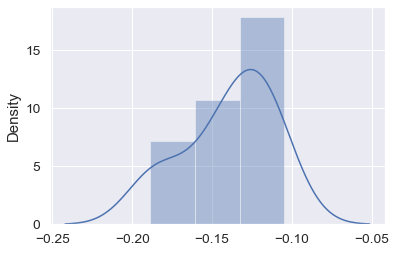

In [31]:
AdaRandomForestReg =  AdaBoostRegressor(RandomForestRegressor(n_estimators = 10), n_estimators = 10)
scores_ada = cross_val_score(AdaRandomForestReg, x_train, y_train, cv=10, scoring = 'neg_root_mean_squared_error')
print(f'Mean accuracy: {-np.mean(scores_ada)}')
print(f'Std accuracy: {np.std(scores_ada)}')
sns.distplot(scores_ada)

I observed that using `AdaBoostRegressor` and `RandomForestRegressor` together is really very slow compare to just Random Forest, .<br>
But from above observation, we see that the mean for the cross validation scores of root mean square on the log of Sale price is better for the `AdaBoostRegressor`. Indeed boasting helps to decreases the bias.

In [32]:
AdaRandomForestReg.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(n_estimators=10),
                  n_estimators=10)

In [33]:
y_hat_train = AdaRandomForestReg.predict(x_train)
y_hat_test = AdaRandomForestReg.predict(x_test)

In [34]:
print(f'Train accuracy: {rmse(y_hat_train, y_train)}')
print(f'Mean CV accuracy: {-np.mean(scores_ada)}')
print(f'Test accuracy: {rmse(y_hat_test, y_test)}')

Train accuracy: 0.038900654379115746
Mean CV accuracy: 0.13960430187181547
Test accuracy: 0.15375186365057042


## Kernel Ridge Regression

In [35]:
 from sklearn.kernel_ridge import KernelRidge

In [36]:
Kernel = KernelRidge()

### Hyper-parameter Tuning 

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
Kernel.get_params()

{'alpha': 1,
 'coef0': 1,
 'degree': 3,
 'gamma': None,
 'kernel': 'linear',
 'kernel_params': None}

In [39]:
param_grid = {
    'gamma': [0.5, 1, 0.2],
    'kernel': ['linear', 'sigmoid', 'rbf'],
    'degree': [3, 10, 15],
}

In [40]:
KernelReg_Grid = GridSearchCV(estimator=Kernel, param_grid = param_grid, cv=4, scoring = 'neg_root_mean_squared_error')
KernelReg_Grid.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=KernelRidge(),
             param_grid={'degree': [3, 10, 15], 'gamma': [0.5, 1, 0.2],
                         'kernel': ['linear', 'sigmoid', 'rbf']},
             scoring='neg_root_mean_squared_error')

In [41]:
KernelReg_Grid.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=KernelRidge(),
             param_grid={'degree': [3, 10, 15], 'gamma': [0.5, 1, 0.2],
                         'kernel': ['linear', 'sigmoid', 'rbf']},
             scoring='neg_root_mean_squared_error')

In [42]:
KernelReg_Grid.best_params_

{'degree': 3, 'gamma': 0.5, 'kernel': 'linear'}

In [43]:
print(f'Train accuracy: {-KernelReg_Grid.score(x_train, y_train)}')
print(f'Test accuracy: {-KernelReg_Grid.score(x_test, y_test)}')

Train accuracy: 0.10380108568818504
Test accuracy: 0.1286123836480791


In [44]:
BestKernelReg = KernelRidge(degree= 3, gamma= 0.5, kernel= 'linear')
kernel_scores = cross_val_score(BestKernelReg, x_train, y_train, cv=10, scoring = 'neg_root_mean_squared_error')
print(f'Mean CV accuracy for Linear kernel regression: {-np.mean(kernel_scores)}')

Mean CV accuracy for Linear kernel regression: 0.13951857953143085


In [45]:
KernelSigReg = KernelRidge(degree= 3, gamma= 0.5, kernel= 'sigmoid')
kernel_sig_scores = cross_val_score(KernelSigReg, x_train, y_train, cv=10, scoring = 'neg_root_mean_squared_error')
print(f'Mean CV accuracy for sigmoid Kernel Regression: {-np.mean(kernel_sig_scores)}')

Mean CV accuracy for sigmoid Kernel Regression: 0.3974110932790844


We observed that the sigmoid kernel regerssion has really high root mean square value compare to others. Therefore, from the GridSearch we found that the best is the linear kernel method.
After comparing the cross validation results of root mean square value. 
The RandomForest with 10 trees are less accurate than the linear kernel method. 
However, the Adaboosted RandomForest is slightly better than the linear kernel method. 

## Shallow Neural Network

In [46]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import MSE
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

In [47]:
x_train.shape
x_dim = x_train.shape[1]

In [48]:
display_all(x_train)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
147,148,60,9505,7,5,2001,2001,0,0,884,884,884,1151,0,2035,0,0,2,1,3,1,8,1,2,434,144,48,0,0,0,0,0,5,2010,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
968,969,50,5925,3,6

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_normalized = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test_normalized = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
display_all(x_train_normalized)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.100754,0.235294,0.050226,0.666667,0.500,0.934783,0.850000,0.000000,0.000000,0.378425,0.144681,0.126205,0.614850,0.0,0.320460,0.000000,0.0,0.666667,0.5,0.375,0.0,0.500000,0.333333,0.50,0.306065,0.168028,0.087751,0.00000,0.000000,0.0,0.0,0.000000,0.363636,1.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.

In [50]:
x = Input(shape = (x_dim,))
x_1 = Dense(units = 40, activation = 'relu')(x)
x_2 = Dense(units = 1, activation = 'relu')(x_1)
shallow_nn = Model(inputs =x, outputs = x_2)

In [51]:
shallow_nn.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 221)]             0         
_________________________________________________________________
dense (Dense)                (None, 40)                8880      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 8,921
Trainable params: 8,921
Non-trainable params: 0
_________________________________________________________________


In [52]:
shallow_nn.compile(
    loss=['mse'],
    optimizer= Adam(learning_rate = 0.001),
    metrics=['mse'],
)

We found out that the data need to be normalized in order for the neural network to work. If not the mse will remain constant after 1 iteration.

In [53]:
history = shallow_nn.fit(
    x=x_train_normalized,
    y=y_train,
    batch_size = 10,
    epochs=100,
    validation_data=(x_test_normalized, y_test),
    verbose=2,
)

Epoch 1/100
132/132 - 0s - loss: 28.7220 - mse: 28.7220 - val_loss: 0.3404 - val_mse: 0.3404
Epoch 2/100
132/132 - 0s - loss: 0.2592 - mse: 0.2592 - val_loss: 0.1824 - val_mse: 0.1824
Epoch 3/100
132/132 - 0s - loss: 0.1663 - mse: 0.1663 - val_loss: 0.1248 - val_mse: 0.1248
Epoch 4/100
132/132 - 0s - loss: 0.1191 - mse: 0.1191 - val_loss: 0.1005 - val_mse: 0.1005
Epoch 5/100
132/132 - 0s - loss: 0.0906 - mse: 0.0906 - val_loss: 0.0738 - val_mse: 0.0738
Epoch 6/100
132/132 - 0s - loss: 0.0735 - mse: 0.0735 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 7/100
132/132 - 0s - loss: 0.0617 - mse: 0.0617 - val_loss: 0.0531 - val_mse: 0.0531
Epoch 8/100
132/132 - 0s - loss: 0.0519 - mse: 0.0519 - val_loss: 0.0439 - val_mse: 0.0439
Epoch 9/100
132/132 - 0s - loss: 0.0443 - mse: 0.0443 - val_loss: 0.0381 - val_mse: 0.0381
Epoch 10/100
132/132 - 0s - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 11/100
132/132 - 0s - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0310 - val_mse: 0.

Epoch 91/100
132/132 - 0s - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0393 - val_mse: 0.0393
Epoch 92/100
132/132 - 0s - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 93/100
132/132 - 0s - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0323 - val_mse: 0.0323
Epoch 94/100
132/132 - 0s - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 95/100
132/132 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0294 - val_mse: 0.0294
Epoch 96/100
132/132 - 0s - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 97/100
132/132 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 98/100
132/132 - 0s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0278 - val_mse: 0.0278
Epoch 99/100
132/132 - 0s - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 100/100
132/132 - 0s - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0325 - val_mse: 0.0325


In [54]:
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df['rmse'] = np.sqrt(history_df['mse'])
history_df['val_rmse'] = np.sqrt(history_df['val_mse'])
display_all(history_df)

,loss,mse,val_loss,val_mse,epoch,rmse,val_rmse
0,28.722040,28.722040,0.340434,0.340434,0,5.359295,0.583467
1,0.259169,0.259169,0.182352,0.182352,1,0.509086,0.427027
2,0.166348,0.166348,0.124839,0.124839,2,0.407858,0.353326
3,0.119086,0.119086,0.100531,0.100531,3,0.345088,0.317067
4,0.090573,0.090573,0.073836,0.073836,4,0.300953,0.271728
5,0.073509,0.073509,0.060291,0.060291,5,0.271125,0.245543
6,0.061684,0.061684,0.053129,0.053129,6,0.248362,0.230497
7,0.051858,0.051858,0.043873,0.043873,7,0.227723,0.209459
8,0.044334,0.044334,0.038108,0.038108,8,0.210556,0.195214
9,0.037949,0.037949,0.034500,0.034500,9,0.194806,0.185743


<AxesSubplot:xlabel='epoch'>

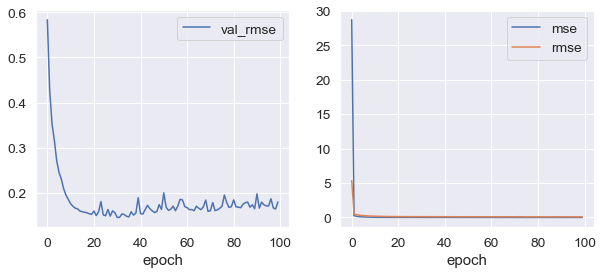

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    
history_df.plot(x='epoch', y=['val_rmse'], ax=ax[0])
history_df.plot(x='epoch', y=['mse', 'rmse'], ax=ax[1])

We see that the 'val_rmse' decrease after 20 epoch to below 0.2 to approximately 0.17. This tells us that shallow neural network is not as good as a model compare to linear kernel or Randomforest. 

## Fully Connected Neural Network

In [56]:
def build_deep_nn(layer_sizes):
    x = Input(shape=(x_dim,))
    h =x
    for l in layer_sizes:
        h = Dense(units=l, activation='relu')(h)
    y = Dense(units=1, activation='relu')(h)
    return Model(inputs=x, outputs=y)

In [57]:
deep_nn = build_deep_nn(layer_sizes=[128, 64, 32])

In [58]:
deep_nn.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 221)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               28416     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 38,785
Trainable params: 38,785
Non-trainable params: 0
_________________________________________________________________


In [59]:
deep_nn.compile(
    loss=['mse'],
    optimizer=Adam(learning_rate = 0.001),
    metrics=['mse'],
)

In [60]:
history = deep_nn.fit(
    x=x_train_normalized,
    y=y_train,
    batch_size=10,
    epochs=100,
    validation_data=(x_test_normalized, y_test),
    verbose=2,
)

Epoch 1/100
132/132 - 0s - loss: 14.8903 - mse: 14.8903 - val_loss: 0.1387 - val_mse: 0.1387
Epoch 2/100
132/132 - 0s - loss: 0.0830 - mse: 0.0830 - val_loss: 0.0755 - val_mse: 0.0755
Epoch 3/100
132/132 - 0s - loss: 0.0421 - mse: 0.0421 - val_loss: 0.0454 - val_mse: 0.0454
Epoch 4/100
132/132 - 0s - loss: 0.0305 - mse: 0.0305 - val_loss: 0.0261 - val_mse: 0.0261
Epoch 5/100
132/132 - 0s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 6/100
132/132 - 0s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 7/100
132/132 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 8/100
132/132 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 9/100
132/132 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 10/100
132/132 - 0s - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 11/100
132/132 - 0s - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0245 - val_mse: 0.

In [61]:
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df['rmse'] = np.sqrt(history_df['mse'])
history_df['val_rmse'] = np.sqrt(history_df['val_mse'])
display_all(history_df)

,loss,mse,val_loss,val_mse,epoch,rmse,val_rmse
0,14.890312,14.890312,0.138724,0.138724,0,3.858797,0.372457
1,0.082967,0.082967,0.075486,0.075486,1,0.288039,0.274746
2,0.042141,0.042141,0.045418,0.045418,2,0.205283,0.213115
3,0.030544,0.030544,0.026071,0.026071,3,0.174769,0.161465
4,0.020006,0.020006,0.025756,0.025756,4,0.141444,0.160488
5,0.016892,0.016892,0.024115,0.024115,5,0.129969,0.155289
6,0.015361,0.015361,0.020741,0.020741,6,0.123940,0.144016
7,0.012637,0.012637,0.020895,0.020895,7,0.112416,0.144551
8,0.012174,0.012174,0.019780,0.019780,8,0.110337,0.140643
9,0.012840,0.012840,0.021486,0.021486,9,0.113312,0.146583


<AxesSubplot:xlabel='epoch'>

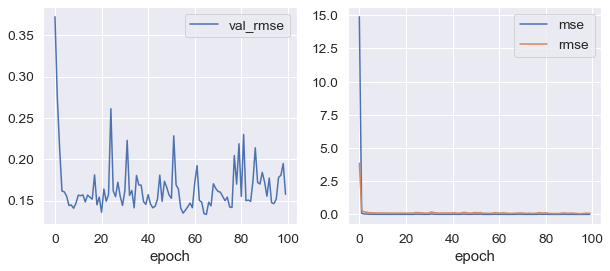

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    
history_df.plot(x='epoch', y=['val_rmse'], ax=ax[0])
history_df.plot(x='epoch', y=['mse', 'rmse'], ax=ax[1])

This is an interesting observation, the fully connected neural network also decrease the 'val_rmse' to below 0.20 after 15 epoch. However, the FCNN has a wider variance for 'val_rmse' as the epoch increases from 0.15 to 0.25. This suggest that FCNN is not a good model compare to shallow neural network. Therefore, it is not even a good model compare to other models stated above.

# Unsupervised Learning

## PCA 

Problem statement: We would want to know how by how much can we reduce the dimension of the dataset without losing much information.

### PCA on non-scaled data

We would want to use PCA to tackle this problem.

In [63]:
from sklearn.decomposition import PCA

In [64]:
pca = PCA(n_components=100)
pca.fit(df_raw)

PCA(n_components=100)

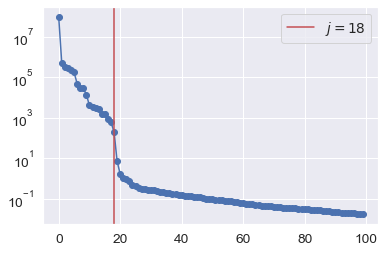

In [65]:
plt.semilogy(pca.explained_variance_, '-o')
plt.axvline(x=18, c='r', ls='-', label=r'$j=18$')
plt.legend()

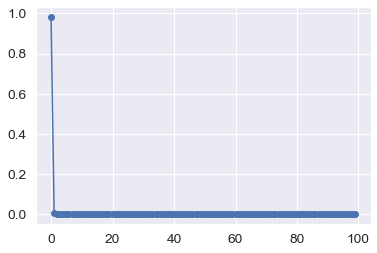

In [66]:
plt.plot(pca.explained_variance_ratio_, '-o')

The explained variance of the first principal component drastically dominates the rest. 
Then the second drop is due to the 18th principal component.

Text(0.5, 1.0, 'First Principal Component Axis')

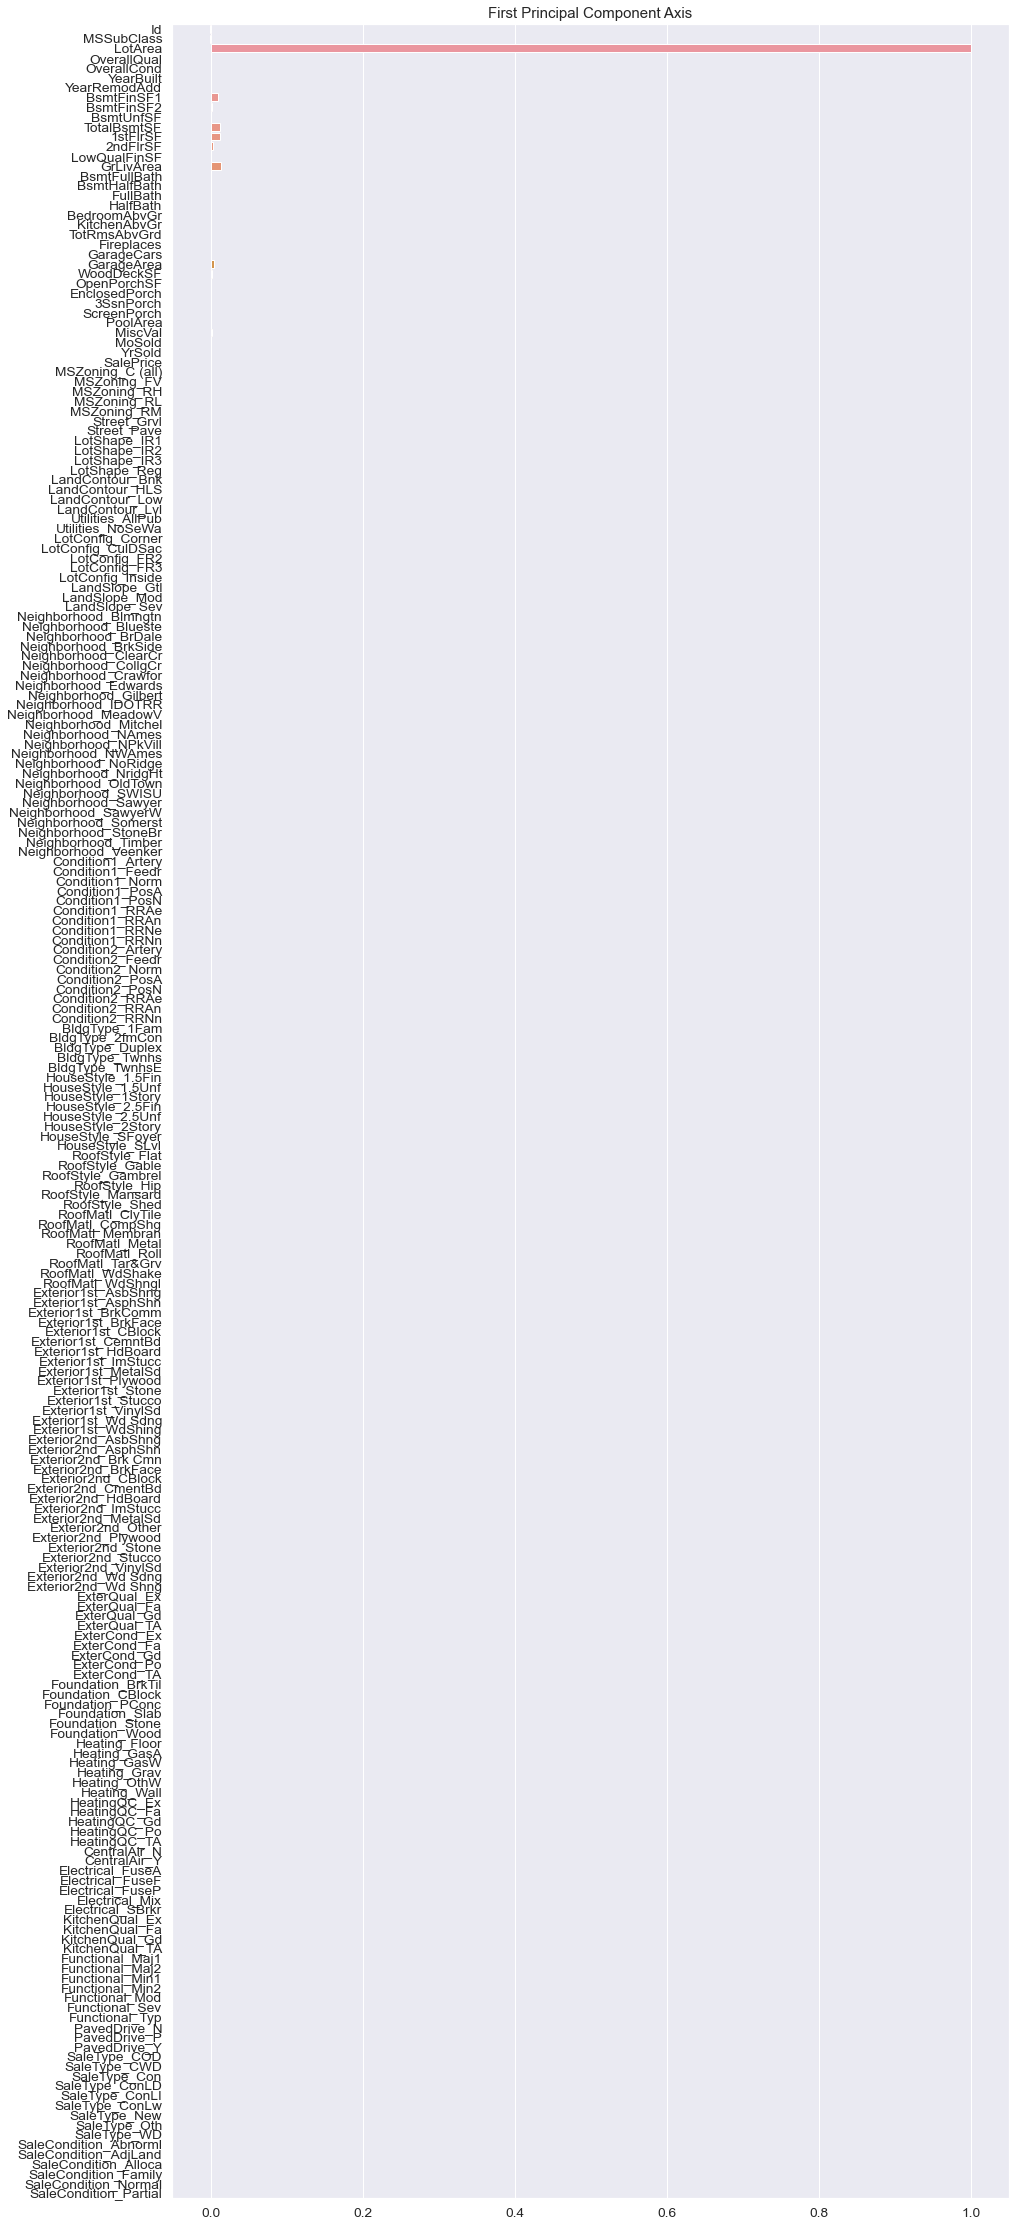

In [67]:
fig, ax= plt.subplots(figsize=(15, 40))
sns.barplot(x=pca.components_[0], y=df_train.columns, orient='h')
##sns.barplot(x=pca.components_[1], y=df_train.columns, orient='h', ax=ax[1])

ax.set_title('First Principal Component Axis')
##ax[1].set_title('Second Principal Component Axis')`

Note that the x axis are the scores. We see that `LotArea` has high values therefore the explained variances will be high therefore as per explained in lecture, we have to normalise the data before doing PCA.

### PCA on scaled data

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_raw_scaled = pd.DataFrame(scaler.fit_transform(df_raw), columns = df_raw.columns)
##df_train_scale = (df_train - df_train.min()) / (df_train.max() - df_train.min())

In [69]:
display_all(df_raw_scaled)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.125089,0.000000,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50,0.581431,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0

In [70]:
pca.fit(df_raw_scaled)

PCA(n_components=100)

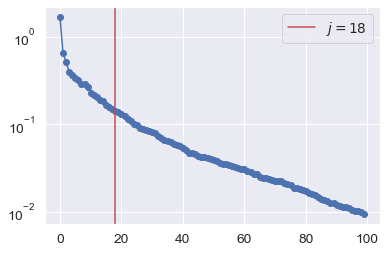

In [71]:
plt.semilogy(pca.explained_variance_, '-o')
plt.axvline(x=18, c='r', ls='-', label=r'$j=18$')
plt.legend()

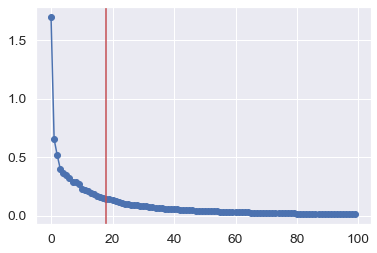

In [72]:
plt.plot(pca.explained_variance_, '-o')
plt.axvline(x=18, c='r', ls='-', label=r'$j=18$')

From the graph, we may actually reduce the dimension to approximately 40 to 65 this will have very low loss of information. <br>
Firstly, we observed that the explained variances reduce very steeply in the first 4 principal component and it then gradually decreases.
Next, we see that the first dimension still dominate the whole of the dataset even after normalization. We shall see what are the variables which are plays a huge part in the first and second component. 

Text(0.5, 1.0, 'First Principal Component Axis')

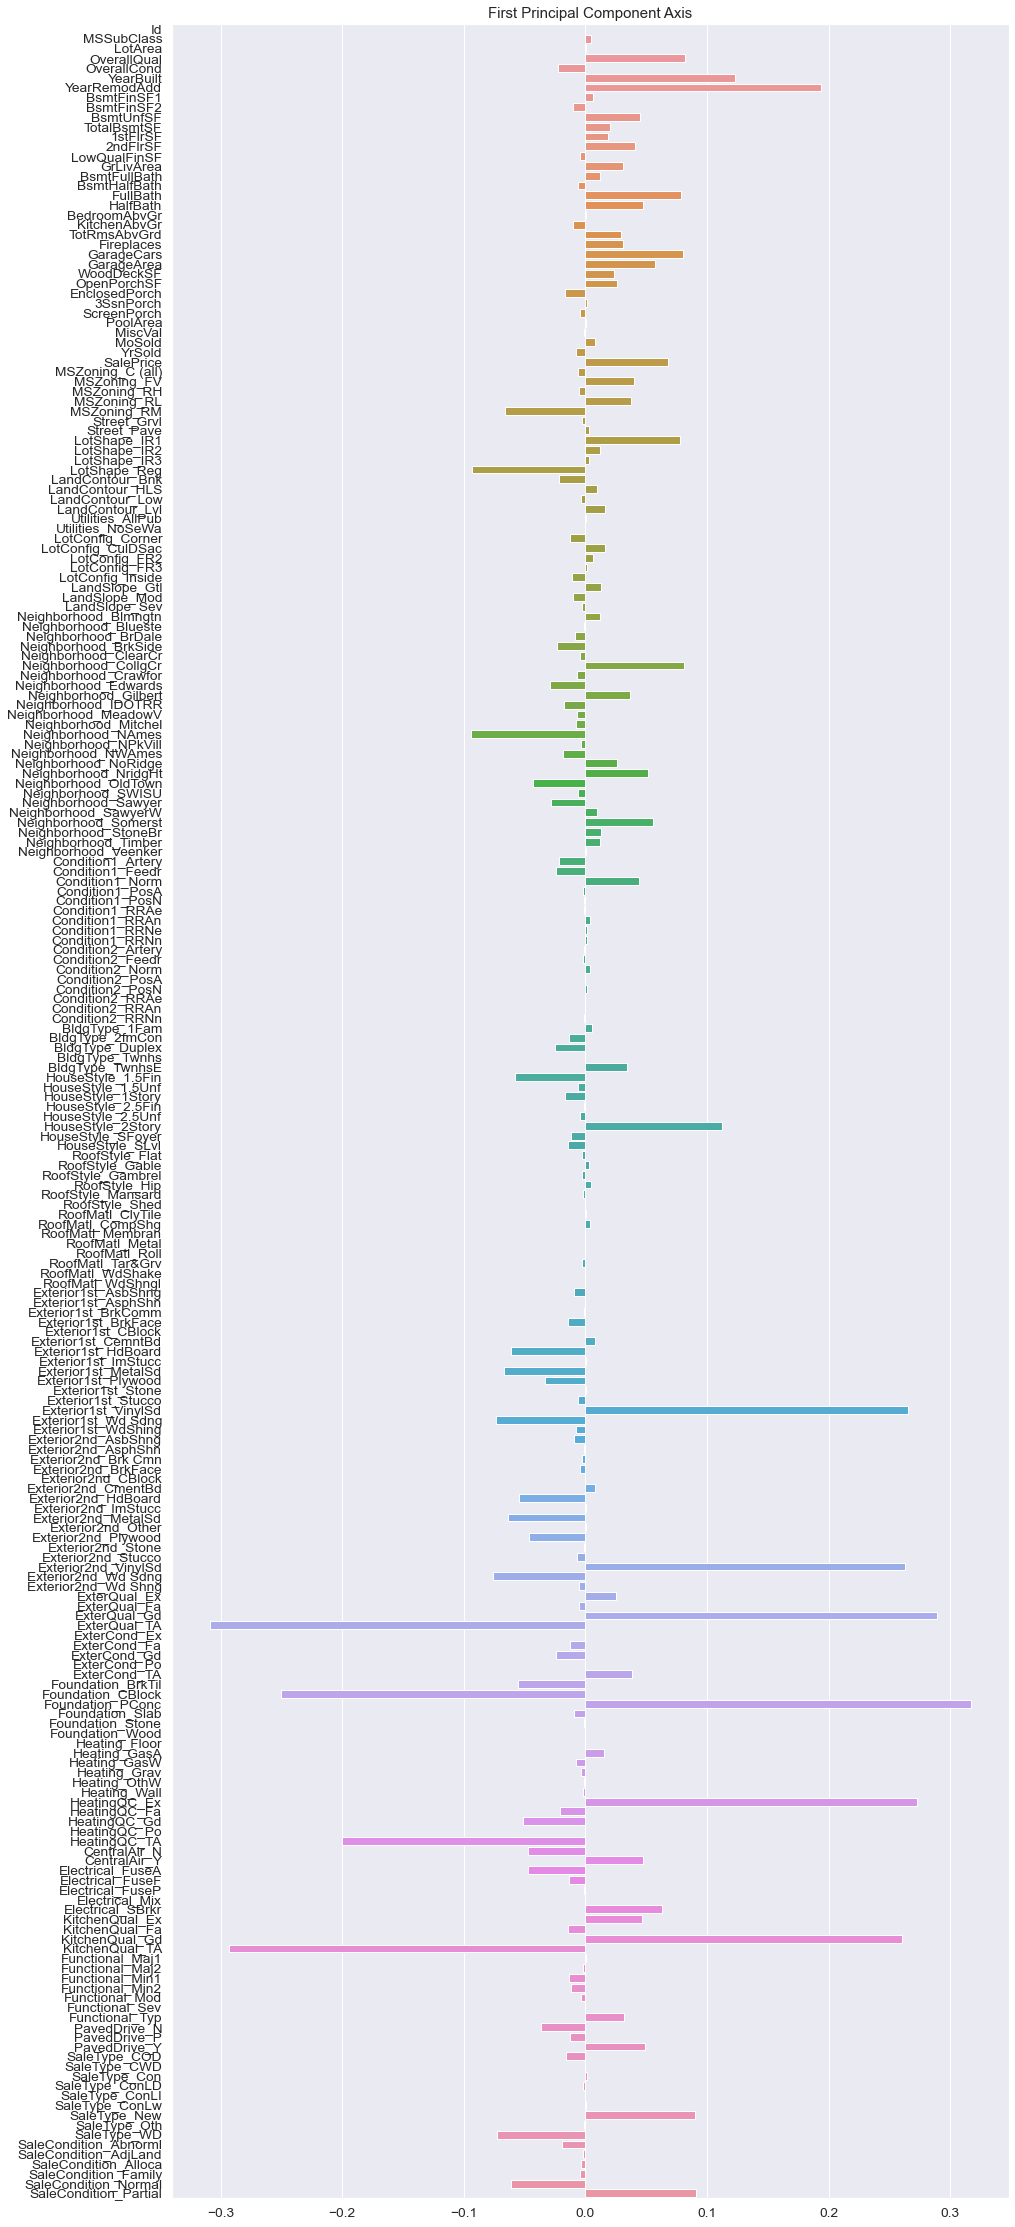

In [73]:
fig, ax= plt.subplots(figsize=(15, 40))
sns.barplot(x=pca.components_[0], y=df_raw_scaled.columns, orient='h')


ax.set_title('First Principal Component Axis')


From the graph on first component principal, we observed that majority of the component is due to the `ExterQual`, `Foundation`, and `KitchenQual`.

Text(0.5, 1.0, 'Second Principal Component Axis')

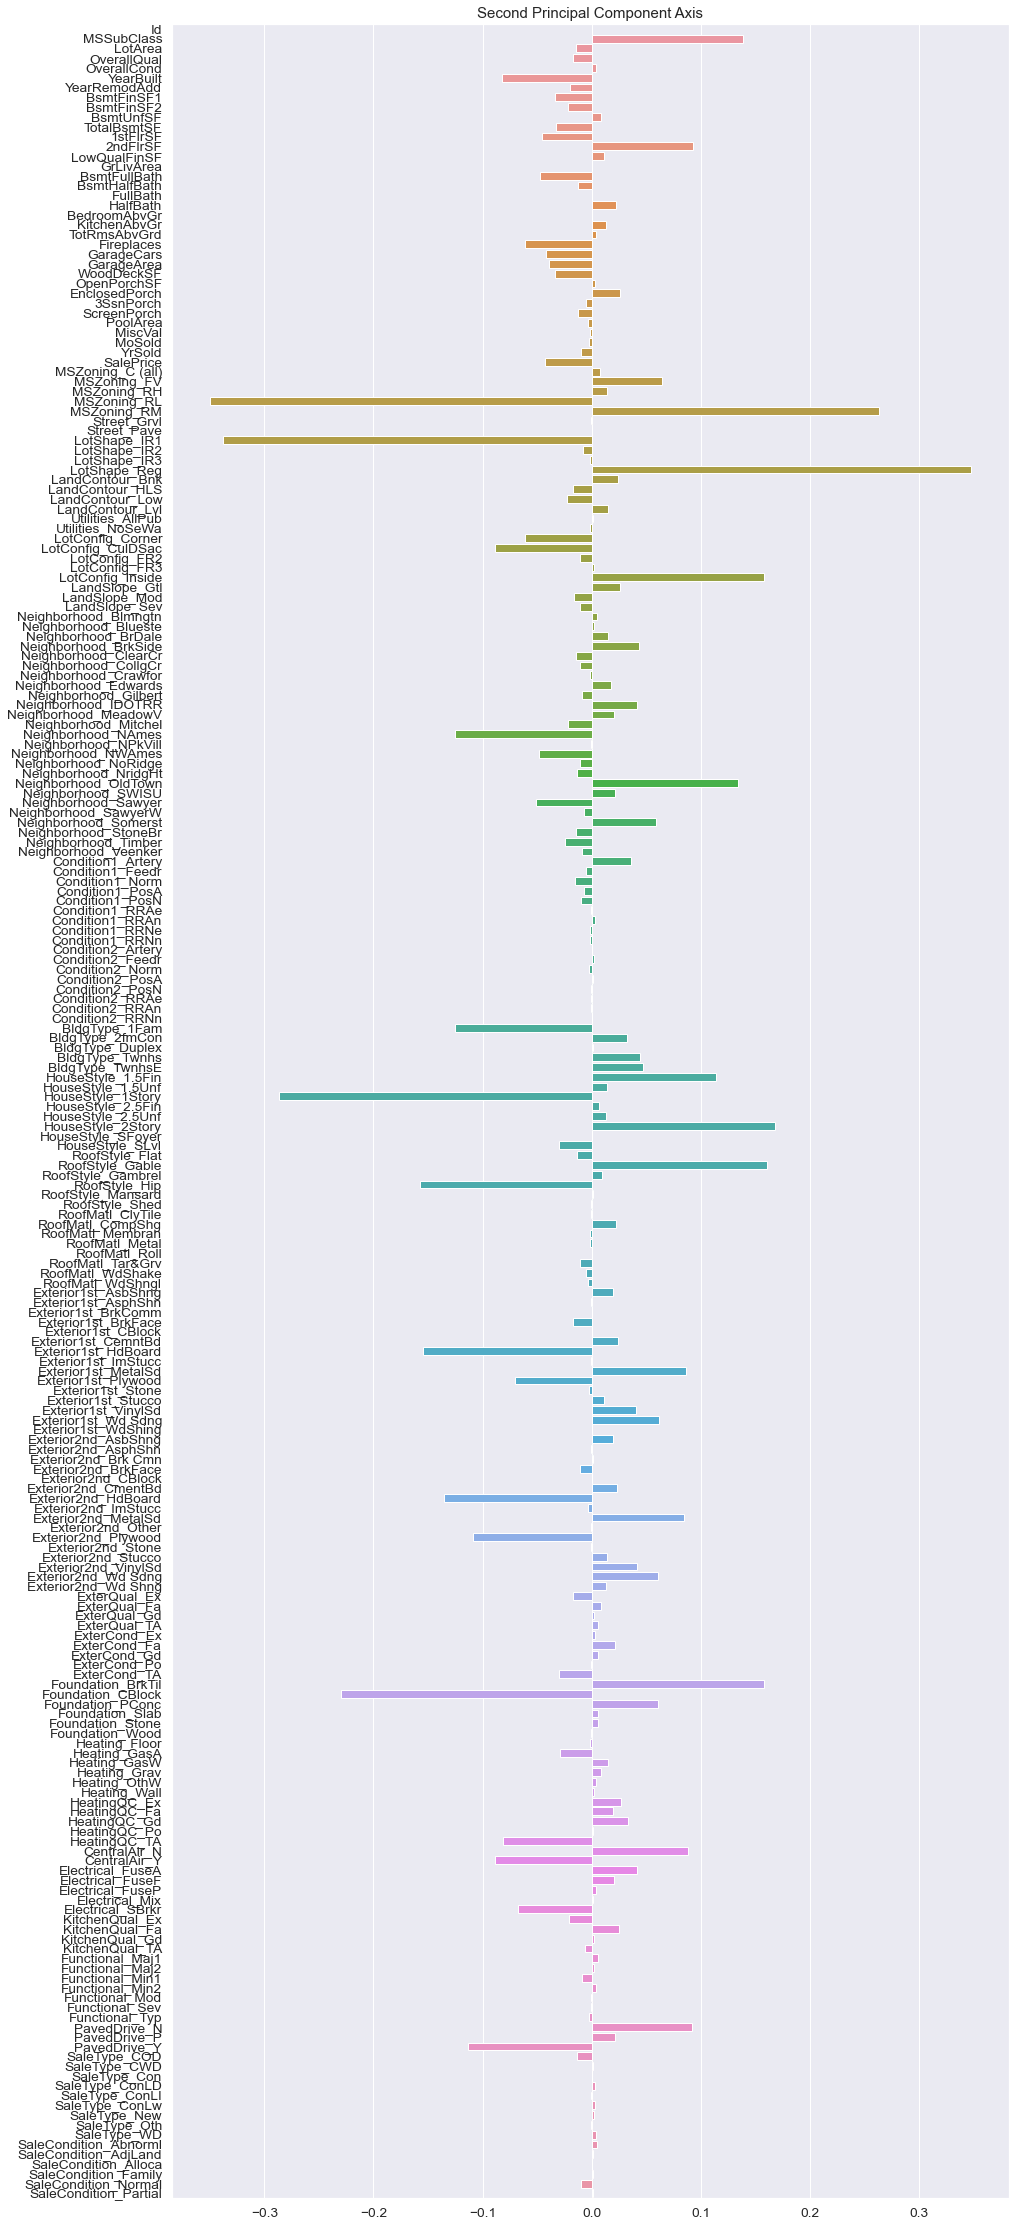

In [74]:
fig, ax= plt.subplots(figsize=(15, 40))
sns.barplot(x=pca.components_[1], y=df_raw_scaled.columns, orient='h')
ax.set_title('Second Principal Component Axis')

The second principal component is largely based on `MSZoning`.

## Kernel PCA

In [75]:
from sklearn.decomposition import KernelPCA

In [76]:
kernel_pca= KernelPCA(n_components=100, kernel='sigmoid')

In [77]:
transformed_df=pd.DataFrame(kernel_pca.fit_transform(df_raw_scaled))

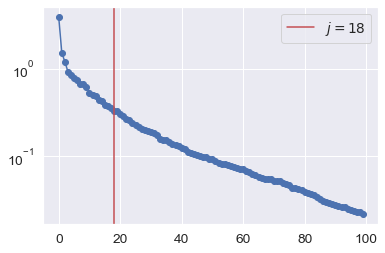

In [78]:
plt.semilogy(kernel_pca.lambdas_, '-o')
plt.axvline(x=18, c='r', ls='-', label=r'$j=18$')
plt.legend()

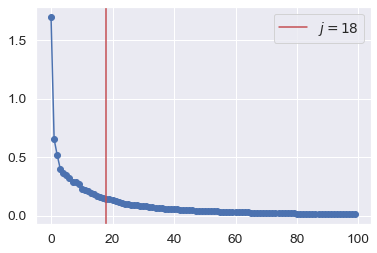

In [79]:
plt.plot(pca.explained_variance_, '-o')
plt.axvline(x=18, c='r', ls='-', label=r'$j=18$')
plt.legend()

Text(0.5, 1.0, 'First Kernel Principal Component Axis')

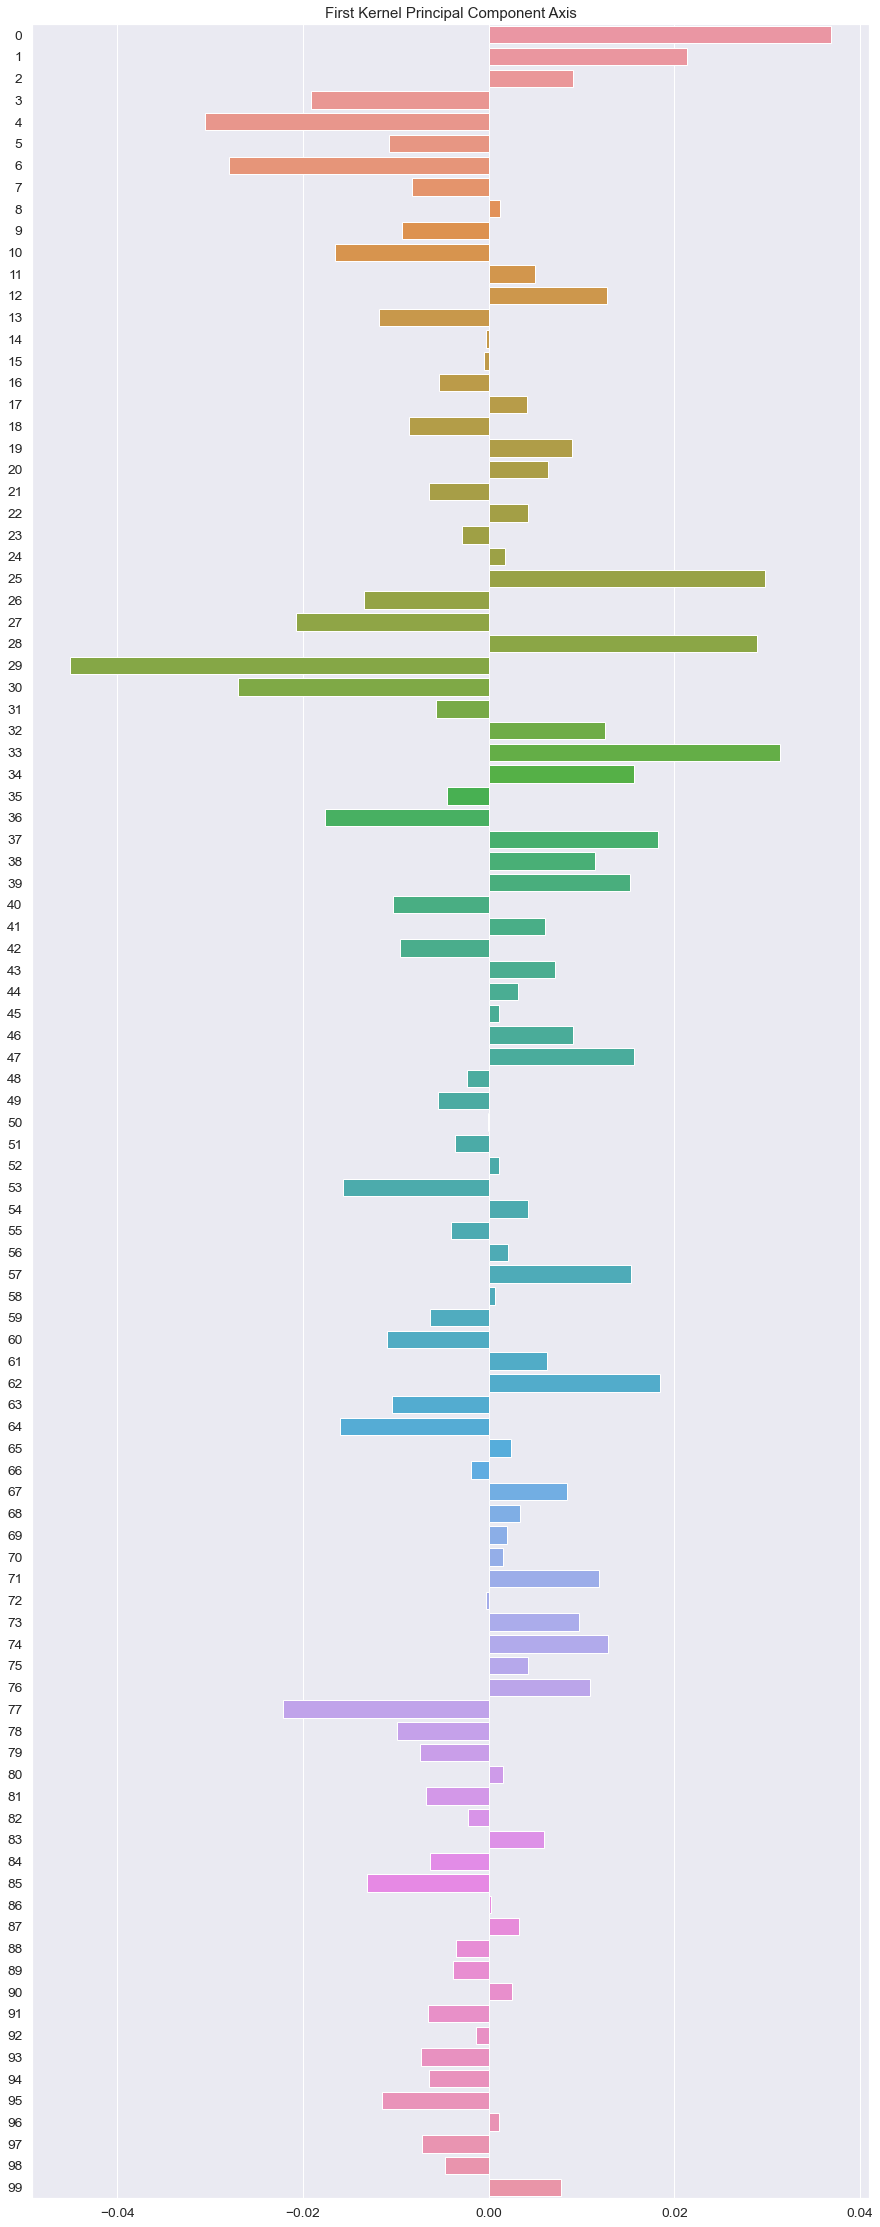

In [80]:
fig, ax= plt.subplots(figsize=(15, 40))
sns.barplot(x=kernel_pca.alphas_[0], y=transformed_df.columns, orient = 'h')


ax.set_title('First Kernel Principal Component Axis')

Text(0.5, 1.0, 'Second Kernel Principal Component Axis')

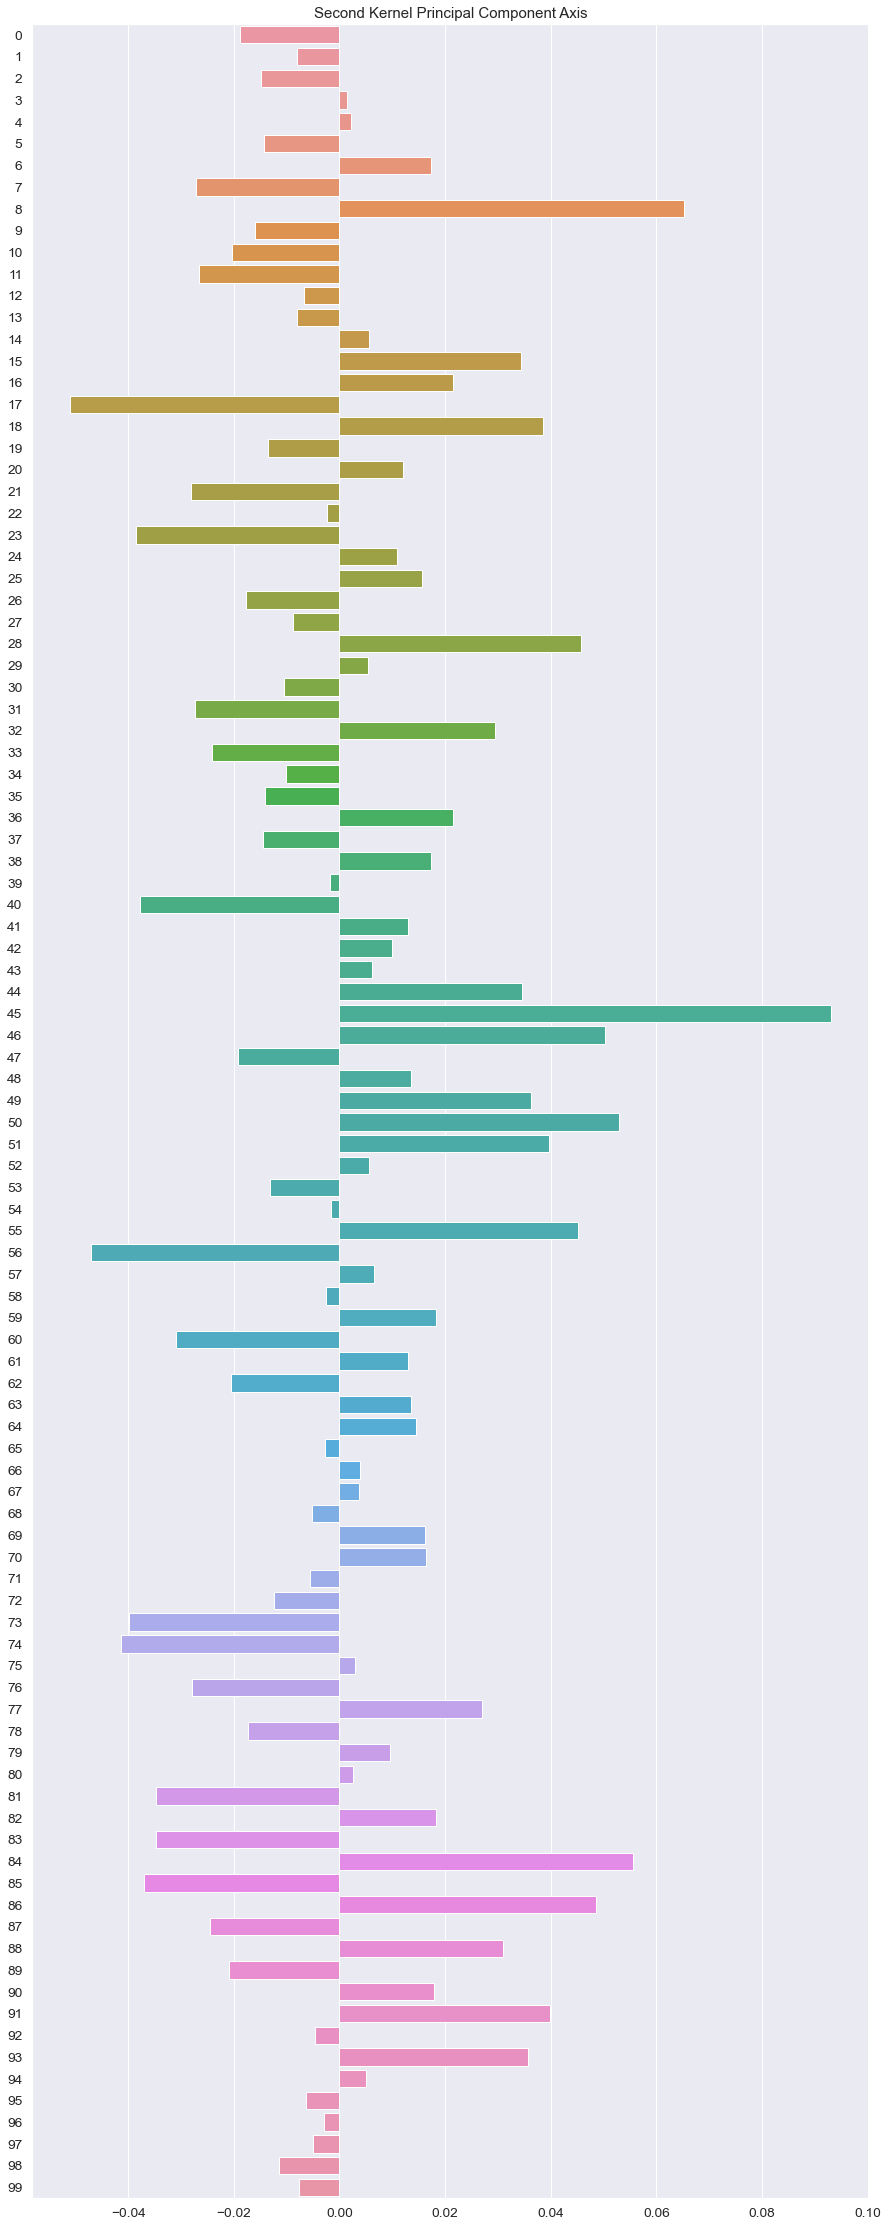

In [81]:
fig, ax= plt.subplots(figsize=(15, 40))
sns.barplot(x=kernel_pca.alphas_[1], y=transformed_df.columns, orient = 'h')


ax.set_title('Second Kernel Principal Component Axis')

## Clustering

Problem statement: We would want to know if we can cluster the dataset. 

### K-Mean Algorithm

In [83]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

In [84]:
losses = []
for K in range(1, 150):
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(df_raw_scaled)
    losses.append(kmeans.inertia_)

Text(0, 0.5, 'Loss')

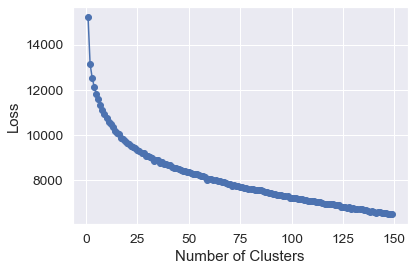

In [85]:
plt.plot(range(1,150), losses, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Loss')

We observed that the loss is still very high even when we increase the number of cluster. The loss also decreases monotonically, therefore it is difficult to determine a good number of cluster to cluster the dataset. We shall use a metric to help us understand and determine how well the cluster are. We shall use the Silhouette Coefficient values.

#### Silhouette Analysis

For each sample $x$, 
let $a$ be the average distance from all data point in the same cluster and $b$ be the average distance from all data point in the closest cluster that the data point is not part of. 
Then we will calculate the Silhouette Coefficient of $x$: 
$$\frac{b-a}{\max{(a,b)}}$$

The coefficient can take values in the interval $[-1,1]$.
- If it is 0, then the sample is very close to the neighboring clusters.
- If it is 1, then the sample is far away from the neighboring clusters. 
- If it is -1, then the sample is assigned to the wrong clusters.

In [182]:
avg_scores_kmeans = [0,0] ## pad the first two index.
for k in range(2,15):
    kmeans = KMeans(n_clusters=K)
    kmeans_clusters = kmeans.fit_predict(df_raw_scaled)
    silhouette_vals_kmeans = silhouette_samples(df_raw_scaled, kmeans_clusters)
    avg_scores_kmeans.append(np.mean(silhouette_vals_kmeans))

Text(0, 0.5, 'Average Silhouette Score')

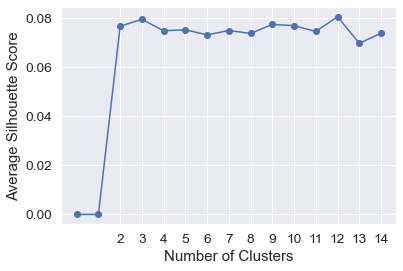

In [183]:
plt.plot(avg_scores_kmeans, '-o')
plt.xticks(range(2,15))
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')

We see that the Average Silhouette Score is around $0.08$, althought it is stable, however it still very low for clustering. This means that Kmean is not a good model for clustering our dataset. <br>
Next we shall look at one particular and see how the Silhouette Score are in each data point.

In [175]:
km = KMeans(n_clusters=14)
clusters = km.fit_predict(df_raw_scaled)
silhouette_vals = silhouette_samples(df_raw_scaled, clusters)

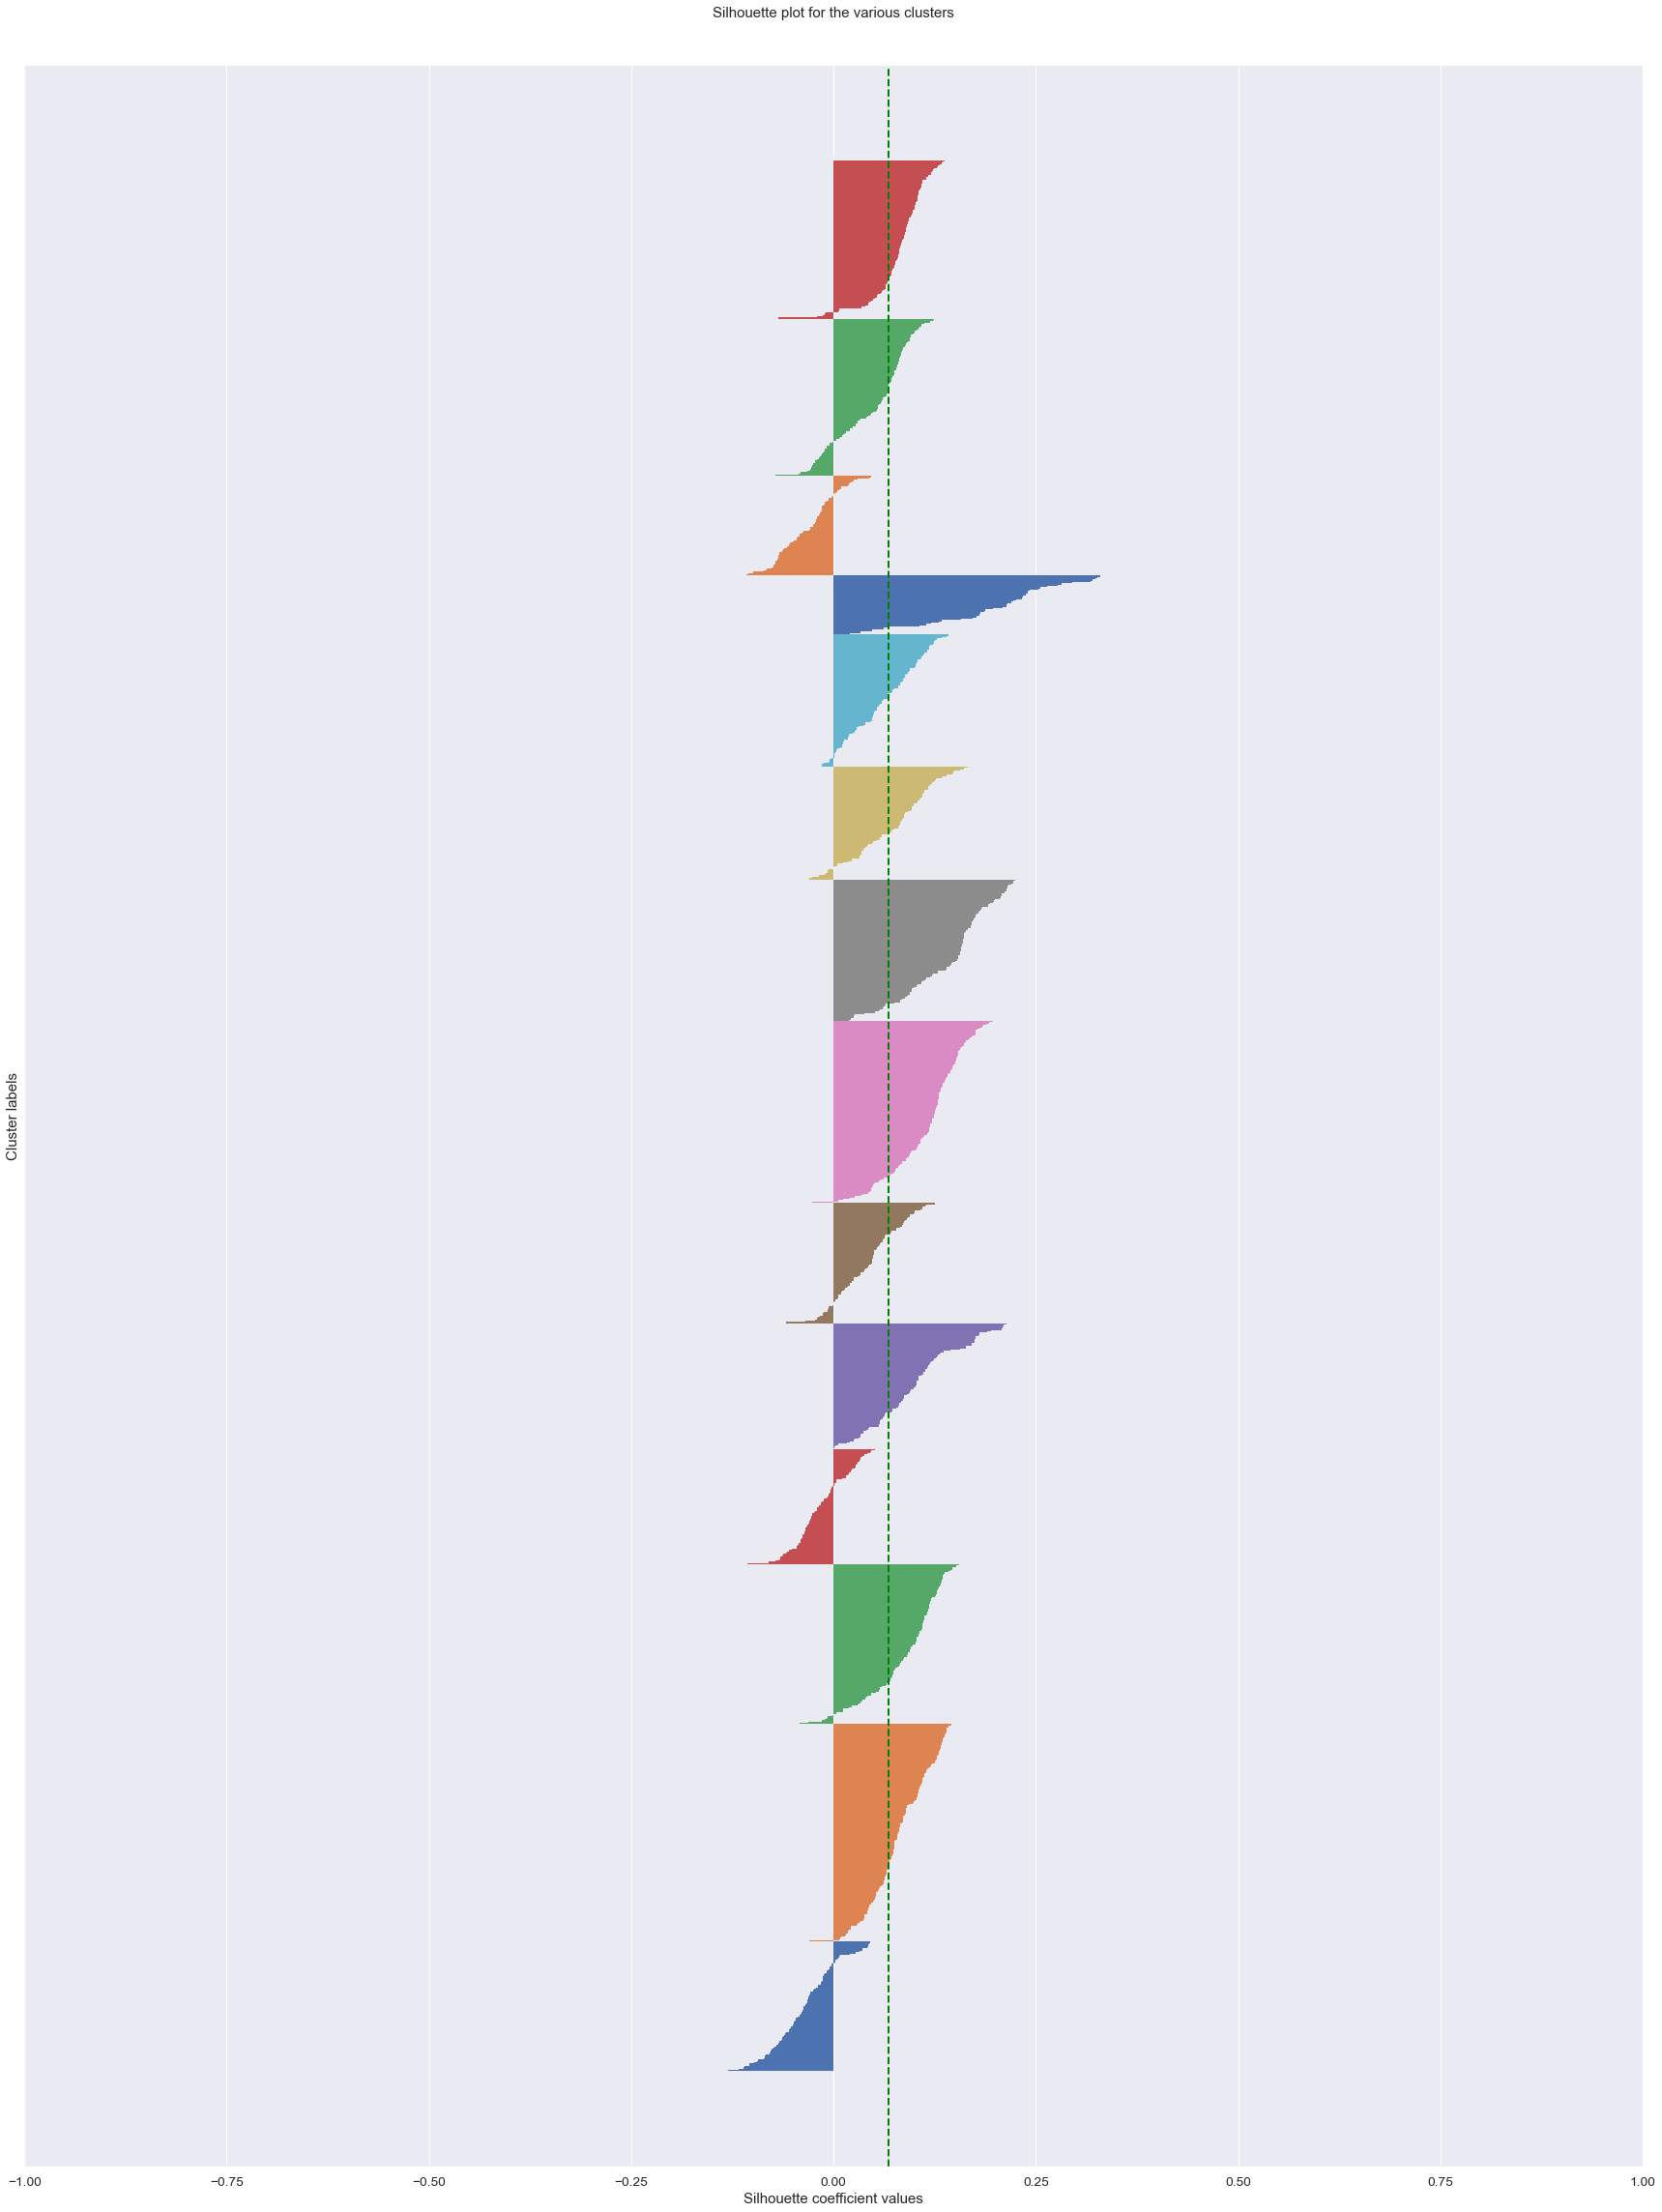

In [176]:
fig, ax1 = plt.subplots(figsize=(30, 40))
#fig.set_size_inches(18, 7)
# Silhouette plot
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(clusters)):
    cluster_silhouette_vals = silhouette_vals[clusters == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    #ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)

# Get the average silhouette score and plot it
avg_score_kmeans = np.mean(silhouette_vals)
ax1.axvline(avg_score_kmeans, linestyle='--', linewidth=2, color='green')
ax1.set_yticks([])
ax1.set_xlim([-1, 1])
ax1.set_xlabel('Silhouette coefficient values')
ax1.set_ylabel('Cluster labels')
ax1.set_title('Silhouette plot for the various clusters', y=1.02);

We obeserved that there are relatively very close to $0$ and there are negative values. This means that the cluster is not a good model.

### Gaussian Mixture Model

In [89]:
from sklearn.mixture import GaussianMixture

In [168]:
avg_scores_gmm = [0,0] ## pad the first two index.
for k in range(2,14):
    gmm = GaussianMixture(n_components = k)
    gmm_clusters = gmm.fit_predict(df_raw_scaled)
    silhouette_vals_gmm = silhouette_samples(df_raw_scaled, gmm_clusters)
    avg_scores_gmm.append(np.mean(silhouette_vals_gmm))

Text(0, 0.5, 'Average Silhouette Score')

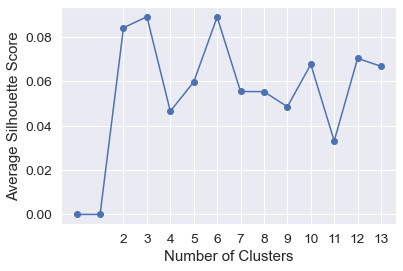

In [169]:
plt.plot(avg_scores_gmm, '-o')
plt.xticks(range(2,14), )
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')

We observed that the Average Silhouette Score is also very low relatively the same as the Kmean model. However there is more flunctuation compare to Kmean. This would probably implies that the GMM model is not a good model even compare to the Kmean model. 

In [187]:
gmm = GaussianMixture(n_components=14)  # How do we choose n_components?
gmm_clusters = gmm.fit_predict(df_raw_scaled)
silhouette_vals_gmm = silhouette_samples(df_raw_scaled, gmm_clusters)

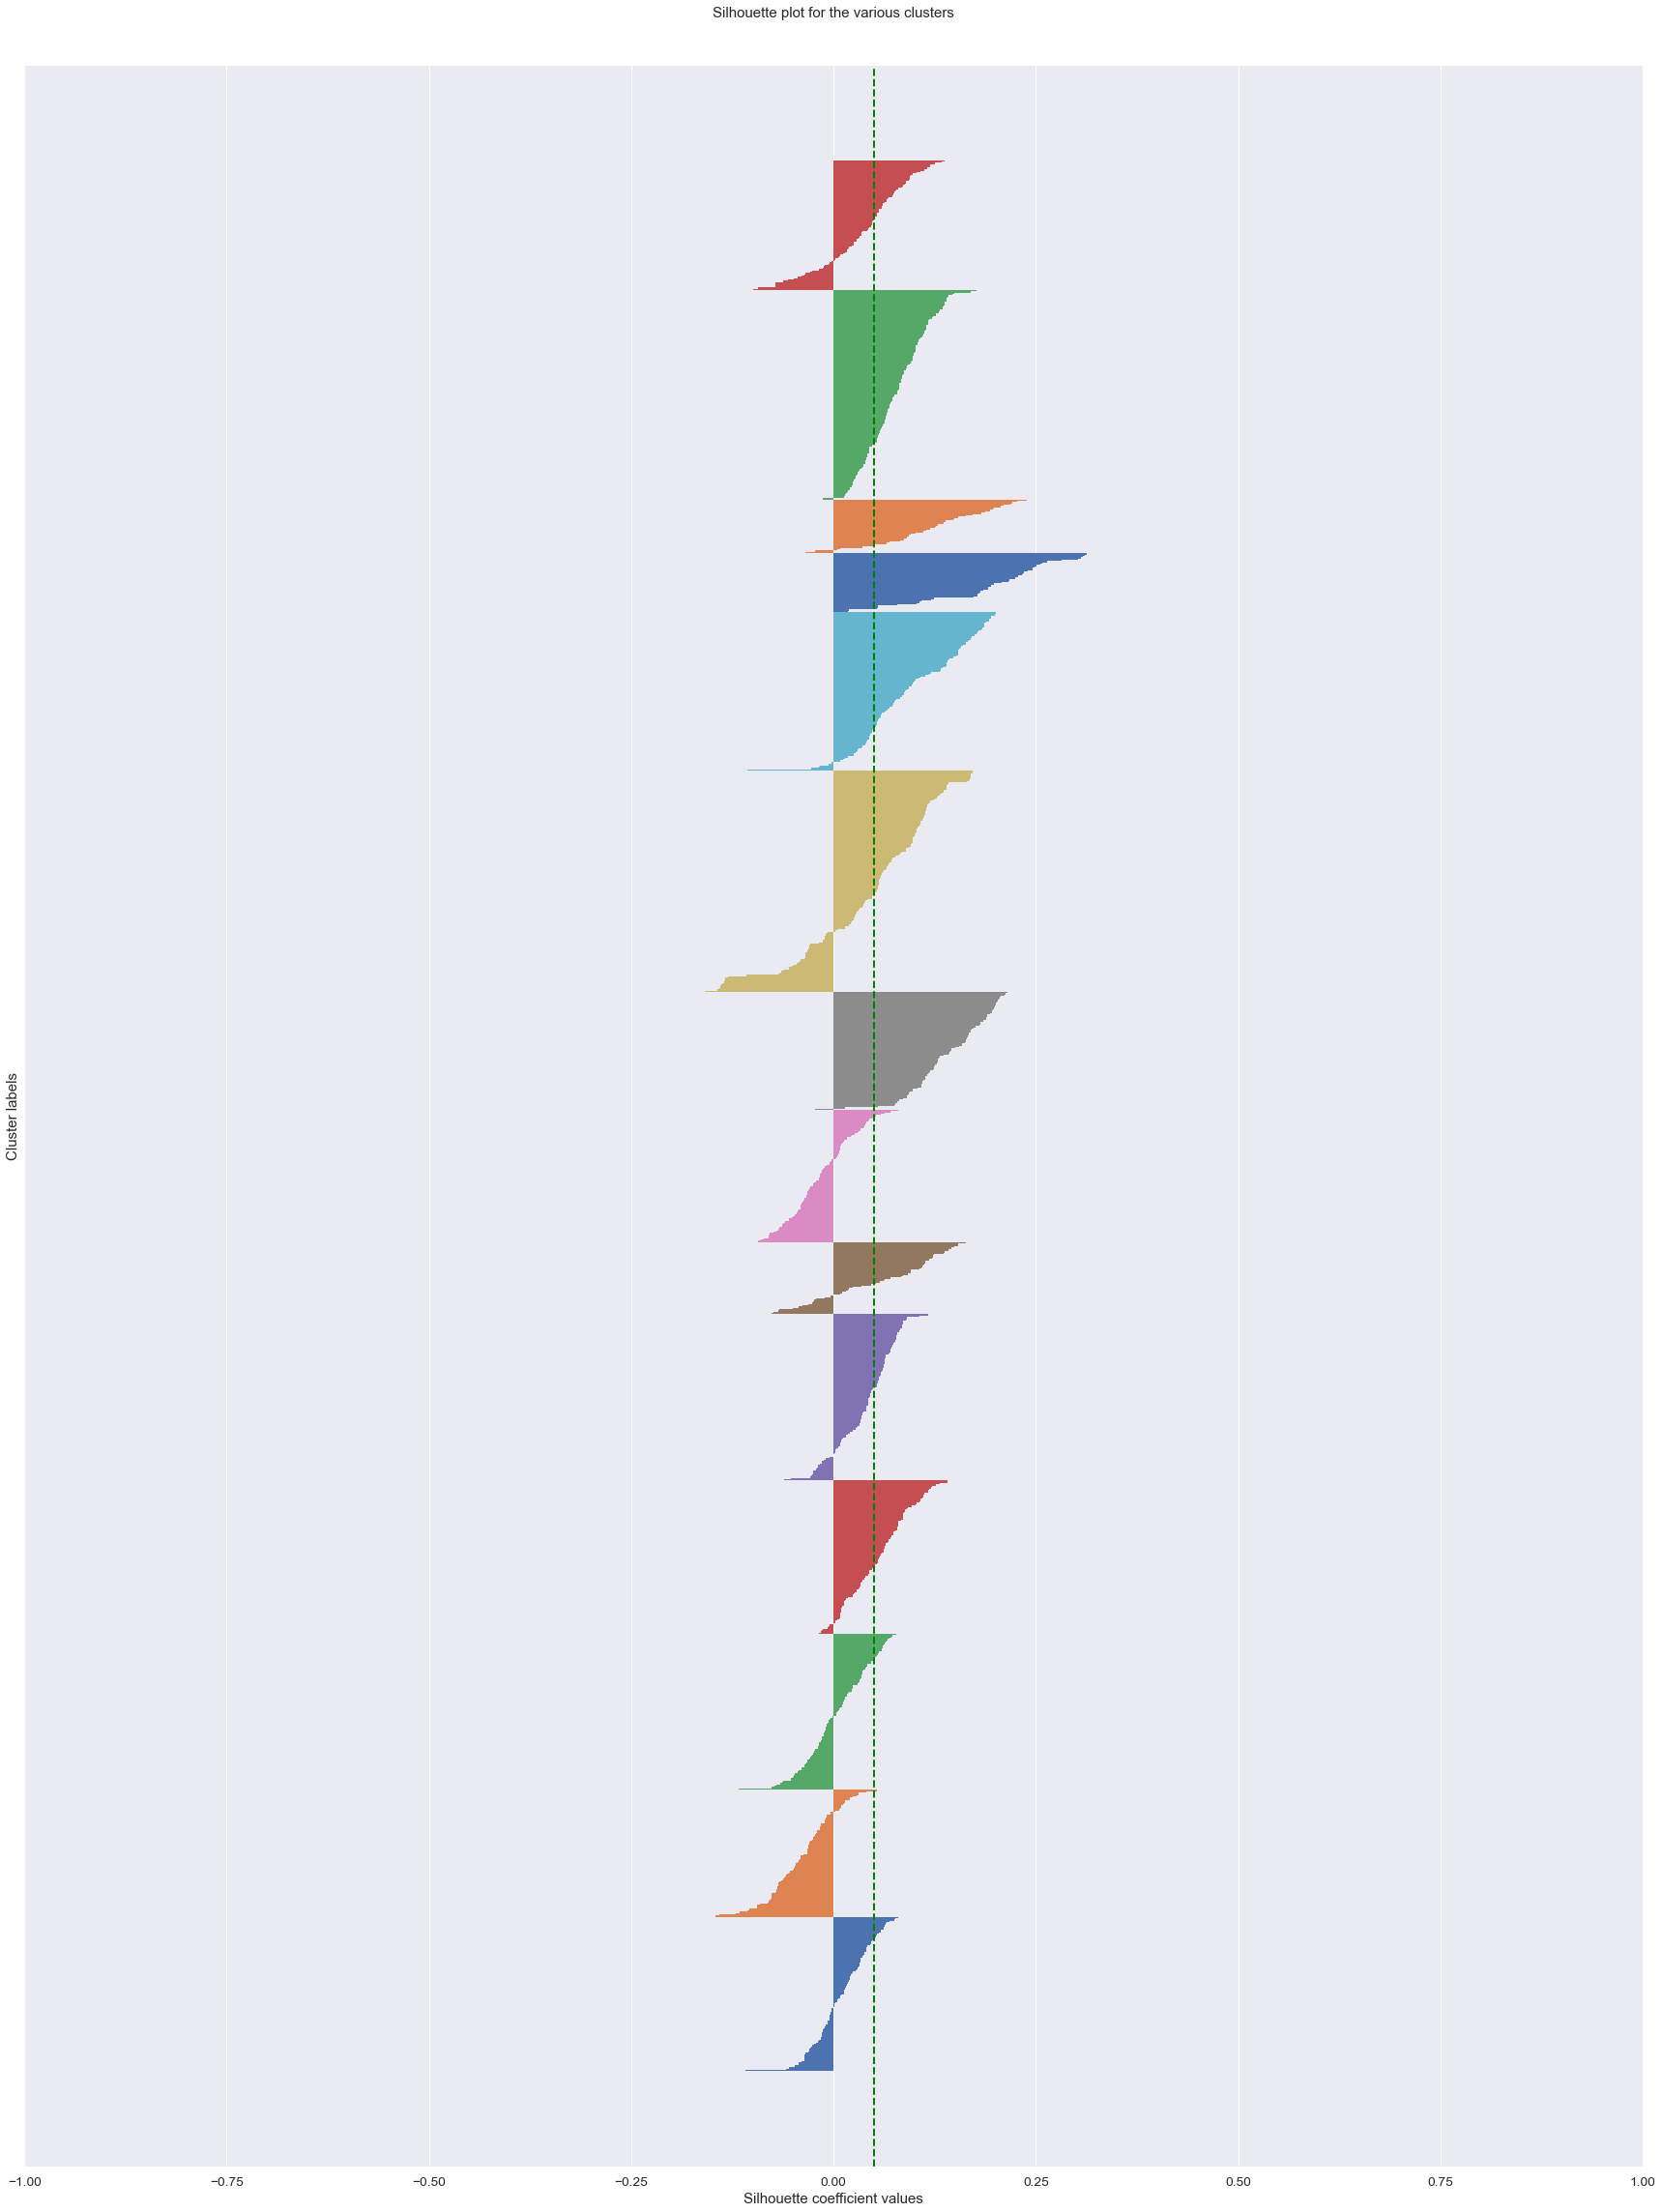

In [188]:
fig, ax = plt.subplots(figsize=(30, 40))
#fig.set_size_inches(18, 7)
# Silhouette plot
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(gmm_clusters)):
    cluster_silhouette_vals = silhouette_vals_gmm[gmm_clusters == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    #ax.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)

# Get the average silhouette score and plot it
avg_score_gmm = np.mean(silhouette_vals_gmm)
ax.axvline(avg_score_gmm, linestyle='--', linewidth=2, color='green')
ax.set_yticks([])
ax.set_xlim([-1, 1])
ax.set_xlabel('Silhouette coefficient values')
ax.set_ylabel('Cluster labels')
ax.set_title('Silhouette plot for the various clusters', y=1.02);

Here we observed the same situation as Kmean. There are negative values and every cluster are have values very close to 0, this also implies that GMM is not a good model to cluster. There are other metric to also help us determine how well the clustering are namely Bayesian information criterion (BIC) and the distance metric which we will not cover here.
We may need to use other models if we want to model this data set or it could be that the data set does not have any cluster properties to begin with.